## EDA

In [57]:
import pandas as pd
import numpy as np


%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

from preprocess import *

In [2]:
df_train = pd.read_csv('/Users/jyp/Desktop/ml_basics/team_project/data/Santander Customer Satisfaction_train.csv',index_col= ['ID'])
df_test = pd.read_csv('/Users/jyp/Desktop/ml_basics/team_project/data/Santander Customer Satisfaction_test.csv',index_col= ['ID'])

In [3]:
print(df_train.shape,df_test.shape)

(76020, 370) (75818, 369)


In [4]:
df_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [6]:
df_train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## VarianceThreshold
이미 preprocess 단계에서 정규화 시켜줘서 굳이 안해도 됨..

각 feature 중 variance(즉 x가 변화할떄 y 변화가 크지 않다면 모델 자체에도 별로 효과적이지 않을 가능성이 높다.따라서 제거하여 연산량을 높여준다.)
하지만 ‘분산’에 의한 선택은 반드시 상관관계와 일치한다는 보장이 없기 때문에 신중하게 사용해야 한다.

In [7]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(df_train)
sum(sel.get_support())

336

In [8]:
df_train_transformed = df_train.loc[:, sel.get_support()]
df_train_transformed.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [9]:
df_test_transformed = df_test.loc[:, sel.get_support()]
df_test_transformed.head()

IndexError: Boolean index has wrong length: 370 instead of 369

## SelectKBest
This method select features according to the k highest scores.
For instance, we can perform a chi-square test to the samples to retrieve only the two best features from iris dataset as follows:


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
SKB = SelectKBest(chi2, k=20)
df_train_skb = SKB.fit_transform(df_train_transformed,y_train)
df_test_skb = SKB.fit_transform(df_test_transformed)

print(df_train_skb)

ValueError: Input X must be non-negative.

<AxesSubplot:title={'center':'santandar'}>

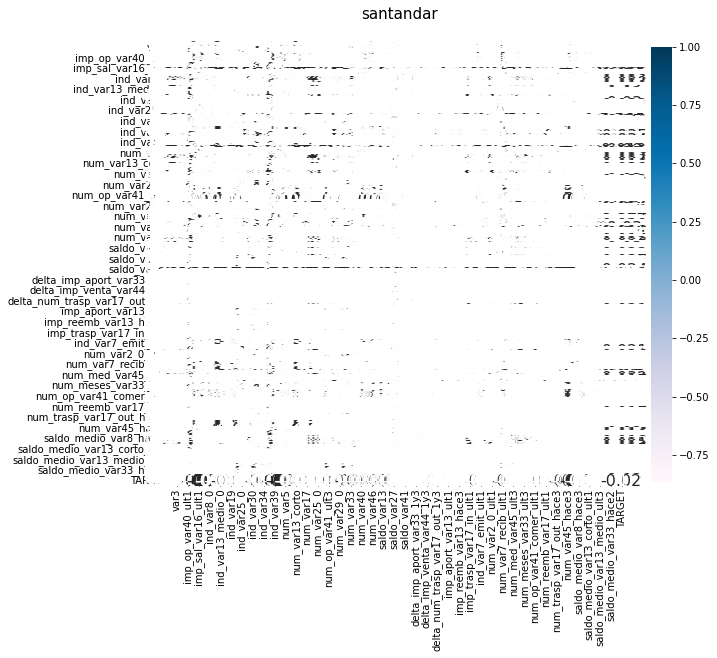

In [ ]:
df_corr = df_train.corr()
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("santandar", y = 1.05, size = 15) 
sns.heatmap(df_corr, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## Models


In [10]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

#### Logistic Regression

In [ ]:
def train_predict_logistic_regression(X_train, y_train, X_test):
    clf = LogisticRegression(C = 2.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    return y_pred

#### XGBoost

In [29]:
import warnings
warnings.filterwarnings('ignore')
def train_predict_xgboost(X_train, y_train, X_test,y_test,df_test):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.02
    param['max_depth'] = 5
    param['eval_metric'] = 'auc'
    param['silent'] = 1
    param['nthread'] = 6
    param['gamma'] = 1.0
    param['min_child_weight'] = 5
    param['subsample'] = 0.8
    param['colsample_bytree'] = 1.0
    param['colsample_bylevel'] = 0.7
    num_round = 500
    param['seed'] = 981004
    plst = list(param.items())
    
    xgmat_train = xgb.DMatrix(X_train, label=y_train, missing = -999.0)
    xgmat_test = xgb.DMatrix(X_test,label=y_test, missing = -999.0)
    wlist = [(xgmat_train, 'train'), (xgmat_test,'eval')]
    xgb_model = xgb.train(params=plst, dtrain= xgmat_train, num_boost_round =num_round,evals=wlist)
   
    pred_probs = xgb_model.predict(xgmat_test)
    print(np.round(pred_probs[:10], 3))

    preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
    print('예측값 10개만 표시: ', preds[:10])   
    
    df_test = xgb.DMatrix(df_test, missing = -999.0)
    pred_probs_tt = xgb_model.predict(df_test)
    print(np.round(pred_probs_tt[:10], 3))

    preds_tt = [ 1 if x > 0.5 else 0 for x in pred_probs_tt]
    print('target 10개만 표시: ', preds_tt[:10])
       
    return preds,preds_tt

#### Eval


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

#### Preprocess


In [13]:
df_train,df_test= process_base(df_train,df_test)
df_train,df_test= drop_sparse(df_train,df_test)
df_train,df_test= drop_duplicated(df_train,df_test)
df_train,df_test= normalize_features(df_train,df_test)

#for xgboost
df_train, df_test = add_features(df_train, df_test, 'SumZeros')
df_train, df_test = add_features(df_train, df_test, 'pca')
df_train.pop('Unnamed: 0')
df_test.pop('Unnamed: 0')

0         76020
1         76021
2         76022
3         76023
4         76024
          ...  
75813    151833
75814    151834
75815    151835
75816    151836
75817    151837
Name: Unnamed: 0, Length: 75818, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
y_labels = df_train.pop('TARGET')
X_features = df_train


x_train, x_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.3, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(x_train.shape , x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

KeyError: 'TARGET'

## XGB

In [35]:
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(missing=np.nan, max_depth=6, 
n_estimators=350, learning_rate=0.025, nthread=4, subsample=0.95,
colsample_bytree=0.85, seed=4242)

xgb_mdl = CalibratedClassifierCV(xgb_classifier, method='isotonic', cv=10)
xgb_mdl.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=None,
                                                    booster=None,
                                                    callbacks=None,
                                                    colsample_bylevel=None,
                                                    colsample_bynode=None,
                                                    colsample_bytree=0.85,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None,
                                                    gamma=None, gpu_id=None,
                                                    grow_policy=None,
                                                    importance_type=None,
                                                    interaction_constraints=None,
                                        

In [36]:
probs_xgb = xgb_mdl.predict_proba(df_test)
submission1 = pd.DataFrame({"ID":df_test.ID, "TARGET": probs_xgb[:, 1]})
submission1.to_csv("submission_xgb.csv", index = False)

## GridSearch


In [44]:
from sklearn.model_selection import KFold,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

model=xgb.XGBClassifier( eval_metric='auc')
params = {'max_depth':[5, 7], 'min_child_weigth':[1,3],'colsample_bytree':[0.5,0.75]}


cv=KFold(n_splits=10, random_state=1004,shuffle=True)
gcv=GridSearchCV(model, param_grid=params, cv=cv,refit=True)

gcv.fit(x_train,y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)

[15:20:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "min_child_weigth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "min_child_weigth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11

In [54]:
model=gcv.best_estimator_  # 최적의 파라미터로 모델 생성
probs = model.predict(df_test)

submission1 = pd.DataFrame({"ID":df_test.ID, "TARGET": probs})
submission1.to_csv("submission_grid.csv", index = False)

## submission


In [19]:

submission = pd.read_csv('/Users/jyp/Desktop/ml_basics/team_project/data/sample_submission.csv')
submission.head()


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
